# **Forecasting Commercial Banks Transactions**

<ol><i>Authors</i>:
    <li>Nobert Akwir</li>
    <li>Karen Amanya</li>
    <li>Eugene Kuloba</li>
    <li>David Mwiti</li>
    <li>Anthony Nene</li>
</ol>

## **1. Business Understanding**

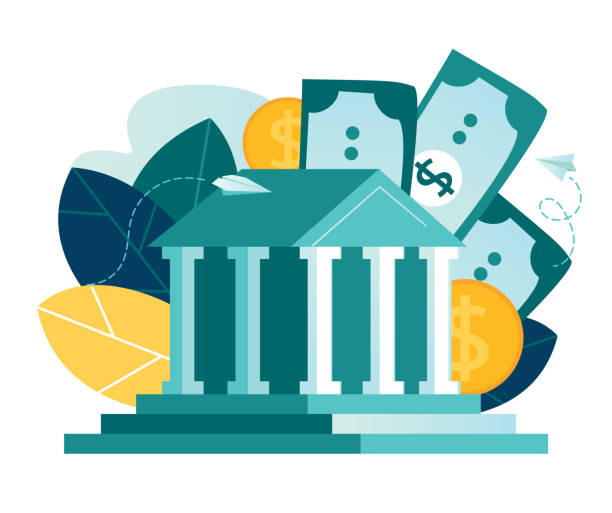

The Banking sector in Kenya has been seeing immense growth over the past few years, this being in direct relation to the penetration rate/ improved access to banking services by major banks we have in Kenya. From the Central Bank’s Financial access report(2021), 29.6% of the total population of Kenyans having formal access to bank services still used physical bank branches.

As this penetration rate has increased, the level of customer interaction and transactions at the branch level has also increased, hence leading to branches requesting more cash from their central vaults, and also repatriating more cash back to the central vault. This sometimes is not the norm, as the branches have to breach their vault limit due to more transactions by the customers even after repatriation is done(which are always in the morning hours), or even having requested less cash hence them not having enough cash to serve the customers.

The branches holding this excess cash leads the bank to incur more expenses as they have to take a cover for the excess cash, and also this is large risk exposure to the bank if the branches get hit. For the less cash perspective, this brings dissatisfaction to their customers and brings down the rating of the bank.

NCBA Bank is a commercial banking company that aims to conduct research to get findings that aid in confirming how much their branches should hold at specific periods in order for them to have sufficient funds to carry out its business with its customers and also not breach its vaults limits.This project aims to develop a time series analysis model that will describe and forecast future transaction thresholds.This will assist the bank’s branches correctly identify the amount of cash they need at specific periods of time in order to prevent being over limit and also have satisfactory cash to serve their customers.


### **Objectives**

> #### **General Objective**
The general objective is to develop a model that will successfully forecast cash transactions that will help NCBA Bank maintain a sufficient cash at its specifc branches.

>#### **Specific Objectives**
<ul type='square'>
    <li >Help the bank to sufficiently meet customers withdrawal needs without fail.</li>
    <li> Help the bank in effectively cutting down on costs related to having excess cash at a branch i.e volt storage    services, insurance , central vault to branch transfer service costs</li>
    <li>Help the bank reduce the risk and adverse effect of robbery</li>
</ul>

>#### **Research Questions**
<ol>
    <li>Is there predictability in the net cash transactions?
</li>
    <li>During which periods should the bank expect high cash outflows and when should they expect high cash inflows or a combination of both?</li>
    <li>What is the a common occurence in the closing cash balances (many lows or many highs)? </li>
</ol>

>#### **Success Criteria**
<ol>
    The following metrics will be used to determine the project's success:
    <li>Ability of our analysis to provide the bank with actionable insights on the nature of their cash transactions that they can use for better planning cost cutting measures and security needs identification.</li>
    <li>The final model's accuracy in forecasting future cash balances</li>
</ol>

## **2. Data Understanding**

The data used in this project is sources from data world. The data consists of demo bank transaction details(debits and credits) carried out by different customers and includes other details such as the amount, the mode of transaction(either cash, RTGS, EFT, SWIFT e.t.c), the account's balance at the time of the transation, the time of the transaction e.t.c

#### **Importing the required libraries**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from decimal import Decimal
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import aic

In [2]:
#loading the data
raw_df = pd.read_csv('C:\\Users\\Karen\\Flatiron\\dsc-data-science-env-config\\course_materials\\Phase_4\\Datasets\\completedtrans.csv')

In [3]:
#shape of the df
raw_df.shape

(1056320, 16)

The dataset contains 1,056,320 rows with 16 columns

In [4]:
#A preview of the df
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25


In [5]:
#descriptrive statitistics of the bumerical data
raw_df.describe()

,Unnamed: 0,amount,balance,account,year,month,day
count,1.056320e+06,1.056320e+06,1.056320e+06,2.953890e+05,1.056320e+06,1.056320e+06,1.056320e+06
mean,5.281605e+05,5.924146e+03,3.851833e+04,4.567092e+07,2.016500e+03,6.573180e+00,1.835395e+01
std,3.049335e+05,9.522735e+03,2.211787e+04,3.066340e+07,1.397469e+00,3.583150e+00,1.019706e+01
min,1.000000e+00,0.000000e+00,-4.112570e+04,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.640808e+05,1.359000e+02,2.240250e+04,1.782858e+07,2.016000e+03,3.000000e+00,9.000000e+00
50%,5.281605e+05,2.100000e+03,3.314340e+04,4.575095e+07,2.017000e+03,7.000000e+00,1.500000e+01
75%,7.922402e+05,6.800000e+03,4.960362e+04,7.201341e+07,2.018000e+03,1.000000e+01,3.000000e+01
max,1.056320e+06,8.740000e+04,2.096370e+05,9.999420e+07,2.018000e+03,1.200000e+01,3.100000e+01


In [6]:
#descriptrive statitistics of the categorical data
raw_df.describe(include = 'object')

,trans_id,account_id,type,operation,k_symbol,bank,fulldate,fulltime,fulldatewithtime
count,1056320,1056320,1056320,873206,574439,273508,1056320,1056320,1056320
unique,1056320,4500,2,5,8,13,2191,33489,1016938
top,T00695247,A00008261,Debit,Cash Withdrawal,Interest Credited,TD Bank,2018-06-30,11:11:46,2017-05-31T14:12:46
freq,1,675,651237,434918,183114,22285,9269,57,5


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1056320 non-null  int64  
 1   trans_id          1056320 non-null  object 
 2   account_id        1056320 non-null  object 
 3   type              1056320 non-null  object 
 4   operation         873206 non-null   object 
 5   amount            1056320 non-null  float64
 6   balance           1056320 non-null  float64
 7   k_symbol          574439 non-null   object 
 8   bank              273508 non-null   object 
 9   account           295389 non-null   float64
 10  year              1056320 non-null  int64  
 11  month             1056320 non-null  int64  
 12  day               1056320 non-null  int64  
 13  fulldate          1056320 non-null  object 
 14  fulltime          1056320 non-null  object 
 15  fulldatewithtime  1056320 non-null  object 
dtype

We observed missing values in 'operation', 'k_symbol', 'bank' and 'account'.The relevant columns , based on our objectives and scope of this project are:
1. Type - decribe whether a transaction is a credit or a debit.
2. Operation - has a narration of the particular type transaction.
3. Amount - transaction amount.
4. fulldate - date of the transaction.

Other observations;
Date objects were in he wrong formats & debit transcations were recorded as positive entries instead of negatives

In [8]:
missing_values = (raw_df['operation'].isna().sum() / raw_df.shape[0]) * 100
print(f'Total percentage of missing values : {round(missing_values)} %')

Total percentage of missing values : 17 %


In [9]:
#filling missing values based on the transaction type: debits to cash withdrawals and credits to cash credits
raw_df['missing_values'] = raw_df['operation'].isna()
raw_df.loc[raw_df['missing_values'] == True]

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,missing_values
137,138,T03591421,A00001844,Credit,NaN,12.6,3754.6,Interest Credited,NaN,NaN,2013,1,31,2013-01-31,10:00:55,2013-01-31T10:00:55,True
138,139,T03617490,A00002632,Credit,NaN,47.5,15411.5,Interest Credited,NaN,NaN,2013,1,31,2013-01-31,11:21:06,2013-01-31T11:21:06,True
139,140,T03579543,A00001493,Credit,NaN,13.3,5222.3,Interest Credited,NaN,NaN,2013,1,31,2013-01-31,08:43:41,2013-01-31T08:43:41,True
140,141,T03558798,A00000866,Credit,NaN,37.1,13181.1,Interest Credited,NaN,NaN,2013,1,31,2013-01-31,09:37:14,2013-01-31T09:37:14,True
141,142,T03453599,A00006473,Credit,NaN,17.0,21078.0,Interest Credited,NaN,NaN,2013,1,31,2013-01-31,15:36:15,2013-01-31T15:36:15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,1056316,T03626622,A00002906,Credit,NaN,62.3,13729.4,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,15:18:14,2018-12-31T15:18:14,True
1056316,1056317,T03627616,A00002935,Credit,NaN,81.3,19544.9,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,13:04:60,2018-12-31T13:04:60,True
1056317,1056318,T03625403,A00002869,Credit,NaN,60.2,14638.2,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,08:30:13,2018-12-31T08:30:13,True
1056318,1056319,T03626683,A00002907,Credit,NaN,107.5,23453.0,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,14:45:19,2018-12-31T14:45:19,True


We noted that the missing values were related to interest payments paid into the accounts and were therefore not missing valuies but irrelevant to our project and will therefore be dropped

#### *Cleaning

In [10]:
#Converting all debit transactions to negative entries
debit_mask = raw_df['type'] == 'Debit'
raw_df.loc[debit_mask, 'amount'] *= -1

In [11]:
#setting the fulldate as the index
raw_df['fulldate'] = pd.to_datetime(raw_df['fulldate'])
raw_df = raw_df.set_index(['fulldate'])
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulltime,fulldatewithtime,missing_values
fulldate,,,,,,,,,,,,,,,,
2013-01-01,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,11:02:40,2013-01-01T11:02:40,False
2013-01-01,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,08:23:33,2013-01-01T08:23:33,False
2013-01-01,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,15:19:21,2013-01-01T15:19:21,False
2013-01-01,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,10:42:35,2013-01-01T10:42:35,False
2013-01-02,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,11:39:25,2013-01-02T11:39:25,False


In [12]:
#Dropping irrelevant columns
relevant_cols = ['type', 'operation', 'amount']

#removing irrelevant columns
raw_df = raw_df[relevant_cols]

#removing operations not related to hard cash
raw_df = raw_df.loc[(raw_df['operation'] == 'Credit in Cash') | (raw_df['operation'] == 'Cash Withdrawal')]

#preview of the new df
print(raw_df.shape)
raw_df.head()

(591661, 3)


,type,operation,amount
fulldate,,,
2013-01-01,Credit,Credit in Cash,700.0
2013-01-01,Credit,Credit in Cash,900.0
2013-01-01,Credit,Credit in Cash,1000.0
2013-01-01,Credit,Credit in Cash,600.0
2013-01-02,Credit,Credit in Cash,400.0


In [13]:
#creating seperate columns for withdawals and credits
raw_df['credit_in_cash'] = raw_df['amount'].map(lambda x: x if x > 0 else 0)
raw_df['cash_withdrawal'] = raw_df['amount'].map(lambda x: x if x < 0 else 0)
raw_df.drop(columns = ['type','operation'], inplace = True)
raw_df.head()

,amount,credit_in_cash,cash_withdrawal
fulldate,,,
2013-01-01,700.0,700.0,0.0
2013-01-01,900.0,900.0,0.0
2013-01-01,1000.0,1000.0,0.0
2013-01-01,600.0,600.0,0.0
2013-01-02,400.0,400.0,0.0


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591661 entries, 2013-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   amount           591661 non-null  float64
 1   credit_in_cash   591661 non-null  float64
 2   cash_withdrawal  591661 non-null  float64
dtypes: float64(3)
memory usage: 18.1 MB


In [15]:
#Downsampling the time series to days
raw_df = raw_df.resample('D').agg({'credit_in_cash':np.sum, 'cash_withdrawal':np.sum})
raw_df.head()

,credit_in_cash,cash_withdrawal
fulldate,,
2013-01-01,3200.0,0.0
2013-01-02,1500.0,0.0
2013-01-03,3700.0,0.0
2013-01-04,2600.0,0.0
2013-01-05,1100.0,0.0


Checking for missing dates

In [16]:
missing_dates = pd.date_range( start="2013-01-01", end="2018-12-31").difference(raw_df.index);
list(missing_dates)

[]

In [17]:
# create a closing balance column by subtracting cash_withdrawal from credit_in_cash 
raw_df['net_cash_balance'] = raw_df['credit_in_cash'] + raw_df['cash_withdrawal']
#preview of the final dataset
raw_df.head()

,credit_in_cash,cash_withdrawal,net_cash_balance
fulldate,,,
2013-01-01,3200.0,0.0,3200.0
2013-01-02,1500.0,0.0,1500.0
2013-01-03,3700.0,0.0,3700.0
2013-01-04,2600.0,0.0,2600.0
2013-01-05,1100.0,0.0,1100.0


In [18]:
raw_df.describe()

,credit_in_cash,cash_withdrawal,net_cash_balance
count,2.191000e+03,2.191000e+03,2.191000e+03
mean,1.103844e+06,-1.067783e+06,3.606063e+04
std,1.150167e+06,7.226317e+05,9.288915e+05
min,0.000000e+00,-4.271755e+06,-2.812557e+06
25%,3.218765e+05,-1.558420e+06,-5.264040e+05
50%,7.243700e+05,-9.268040e+05,-1.867140e+05
75%,1.238682e+06,-5.093325e+05,4.946680e+05
max,5.744399e+06,0.000000e+00,3.113766e+06


###  EDA

Cash Credit Transactions

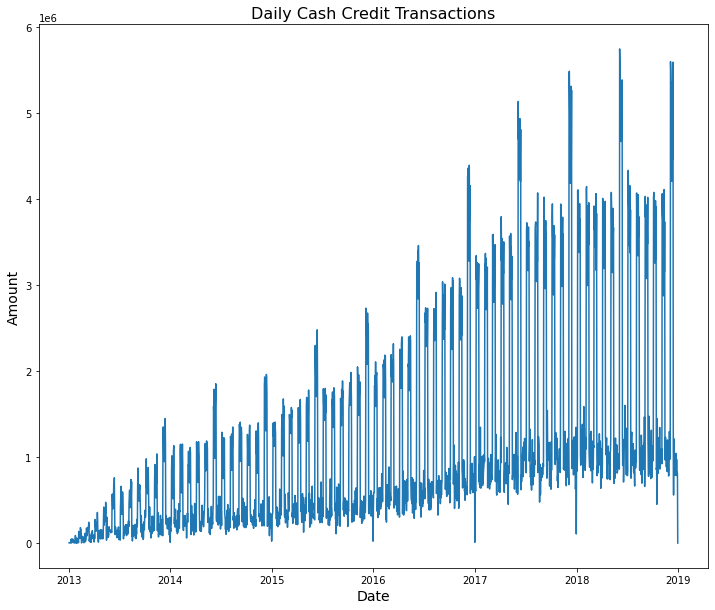

In [19]:
#Visualize transactions
plt.figure(figsize = (12,10))
plt.title('Daily Cash Credit Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.plot(raw_df.index,raw_df['credit_in_cash'])
plt.show();

Observations:
1. An upward linear trend - Cash deposits at the bank have gradually increased over the years.
2. Some seasonality is also observed - there is a downward spike in cash deposits at the beginning of the year.

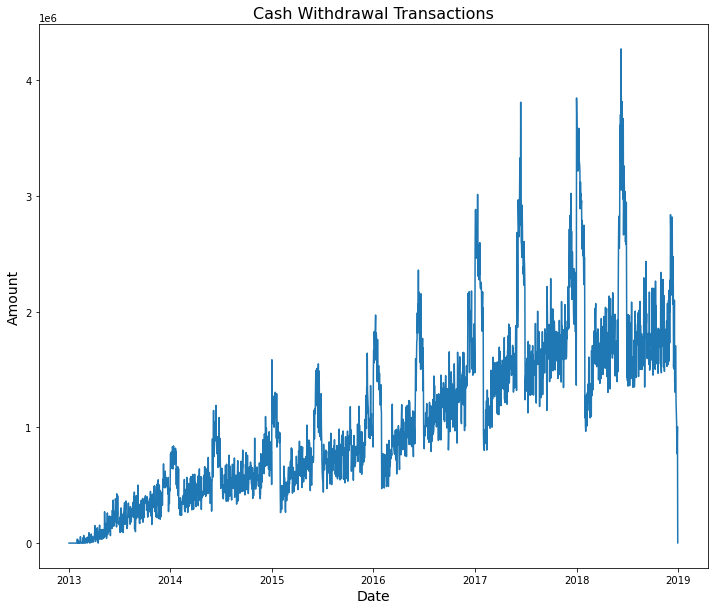

In [20]:
#withdrawals
plt.figure(figsize = (12,10))
plt.title('Cash Withdrawal Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.plot(raw_df.index, np.abs(raw_df['cash_withdrawal']))
plt.show();

Observations:
1. An upward trend - Cash withdrwals at the bank have gradually increased over the year with periodic spikes at the beginning and mid year.
2. A huge downward spike is observed towards the end of 2018 and beginning of 2019.There was an increase in consumer prices and inflation in January 2019 which discouraged spending among the citizens hence less cash withdrawals were being made.

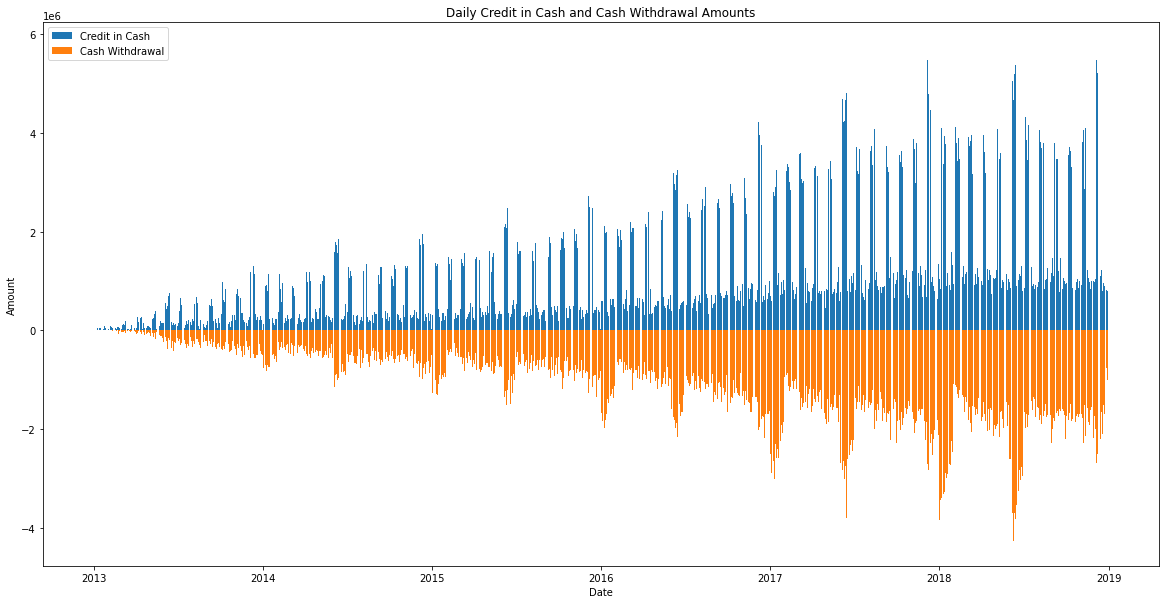

In [21]:
# Group the data by day and sum the amounts
daily_totals = raw_df.groupby(by=pd.Grouper(freq='D')).sum()

# Create the bar plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(daily_totals.index, daily_totals['credit_in_cash'], label='Credit in Cash')
ax.bar(daily_totals.index, daily_totals['cash_withdrawal'], label='Cash Withdrawal')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Daily Credit in Cash and Cash Withdrawal Amounts')
ax.legend()
plt.show()

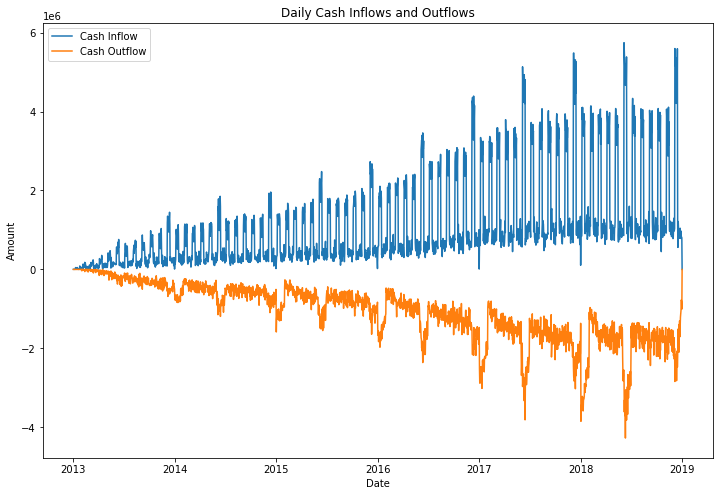

In [22]:
# Line plot of daily cash inflows and outflows
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(raw_df.index, raw_df['credit_in_cash'], label='Cash Inflow')
ax.plot(raw_df.index, raw_df['cash_withdrawal'], label='Cash Outflow')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Daily Cash Inflows and Outflows')
ax.legend()
plt.show()

**Monthly Transaction by Year**

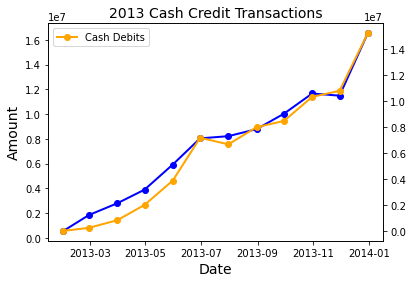

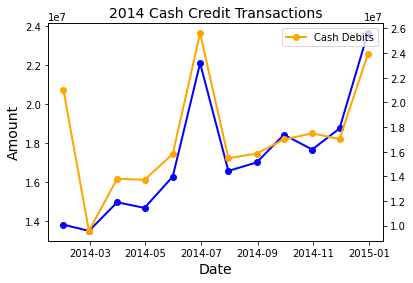

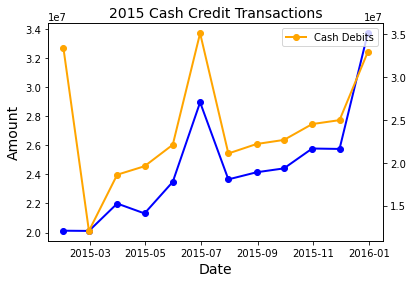

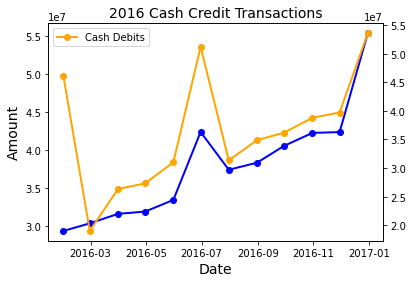

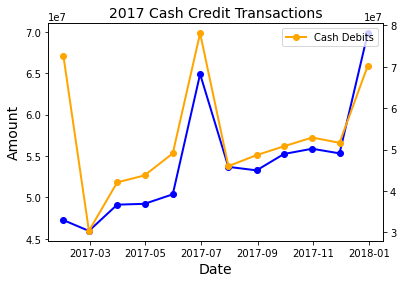

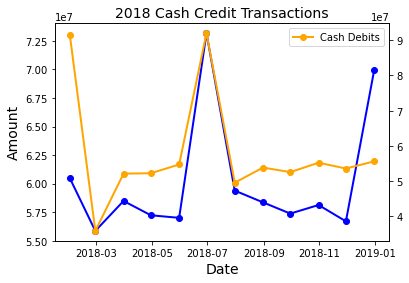

In [23]:
years = ['2013', '2014', '2015', '2016', '2017', '2018']
monthly_cash_transactions = raw_df.resample('M').agg({'credit_in_cash':np.sum, 'cash_withdrawal':np.sum})
for year in years:
    data = monthly_cash_transactions.loc[year]
    fig , ax = plt.subplots()
    plt.title(f'{year} Cash Credit Transactions', fontsize = 14)
    plt.xlabel('Date', fontsize = 14)
    plt.ylabel('Amount', fontsize = 14)
    ax.plot(data.index, data['credit_in_cash'],color='blue', linewidth=2, marker='o', label = 'Cash Credits')
    ax2 = ax.twinx()
    ax2.plot(data.index, np.abs(data['cash_withdrawal']), color='orange', linewidth=2, marker='o', label = 'Cash Debits')
    plt.legend()
    plt.show();

<AxesSubplot:xlabel='fulldate'>

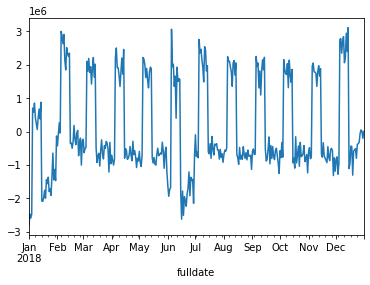

In [24]:
raw_df['net_cash_balance']['2018'].plot()

**Observations**

<ul>More trends are observed from the yearly plots:</ul>
<li>There is an upward spike in cash withdrawals at the end of the year and and the opposite for cash deposits(except  2013 which is the bank branch inception year.Very few transactions were also observed during this year.</li>
<li>There is an increse in both credits and debits in the month of June - which marks the beginning of Summer in the region which attracts alot of tourists</li>


### Target Variable

**Daily Net Cash Balances**

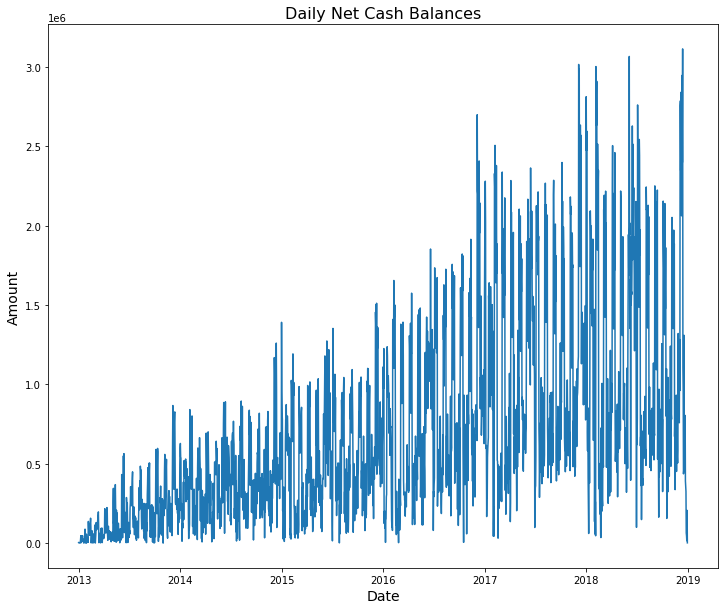

In [25]:
#Visualize closing balances
plt.figure(figsize = (12,10))
plt.title('Daily Net Cash Balances', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.plot(raw_df.index, np.abs(raw_df['net_cash_balance']))
plt.show();

Observations
1. Balances have also increased over the years - this is expected given the increse in cash trasactions - mostly deposits

**Detrending to reveal sub-trend and better observe seasonality(if any) in out target variable**

In [26]:
#getting the rollong mean 
rolling_mean = raw_df['net_cash_balance'].rolling(window = 12).mean()

# Subtract rolling mean from closing_balance
detrended = raw_df['net_cash_balance'] - rolling_mean

# Create new DataFrame with detrended values and date as index
df_detrended = pd.DataFrame({'net_cash_balance': detrended})
df_detrended.index = raw_df.index

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
   
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df_detrended)

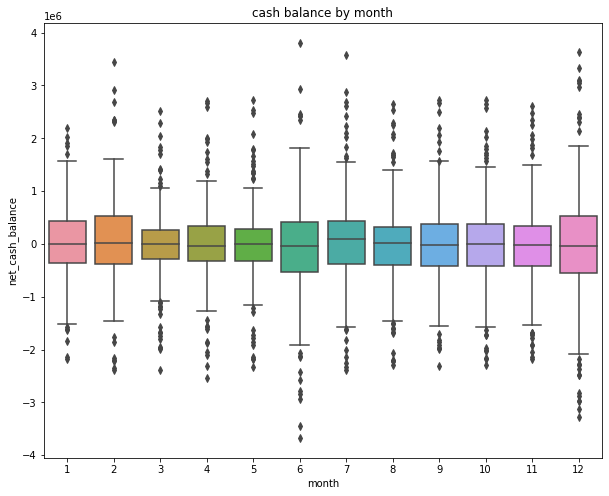

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='net_cash_balance')
ax.set_title('cash balance by month')
plt.show();

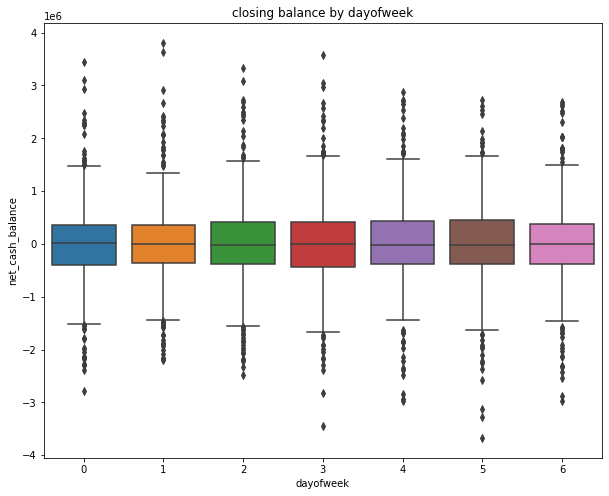

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='net_cash_balance')
ax.set_title('closing balance by dayofweek')
plt.show()

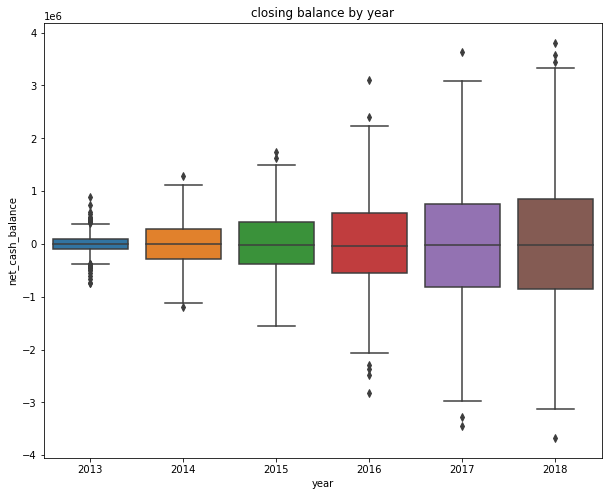

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='net_cash_balance')
ax.set_title('closing balance by year')
plt.show()

## Pre-processing

**Checking for Stationarity**

In [30]:
# Check for stationarity
closing_balances = pd.DataFrame(raw_df['net_cash_balance'])
result = adfuller(closing_balances) 
print('Closing Balance:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Closing Balance:
ADF Statistic: -5.87776291678782
p-value: 3.130122828540417e-07
Critical Values:
	1%: -3.4333740509447717
	5%: -2.8628759187993382
	10%: -2.567481176655697


The test statistic is less than than the critical value at a significance level of 5% and the p-value is also less that than the significance level of 0.05 hence we reject the null hypothesis and consider the series as stationary

**Decomposition**

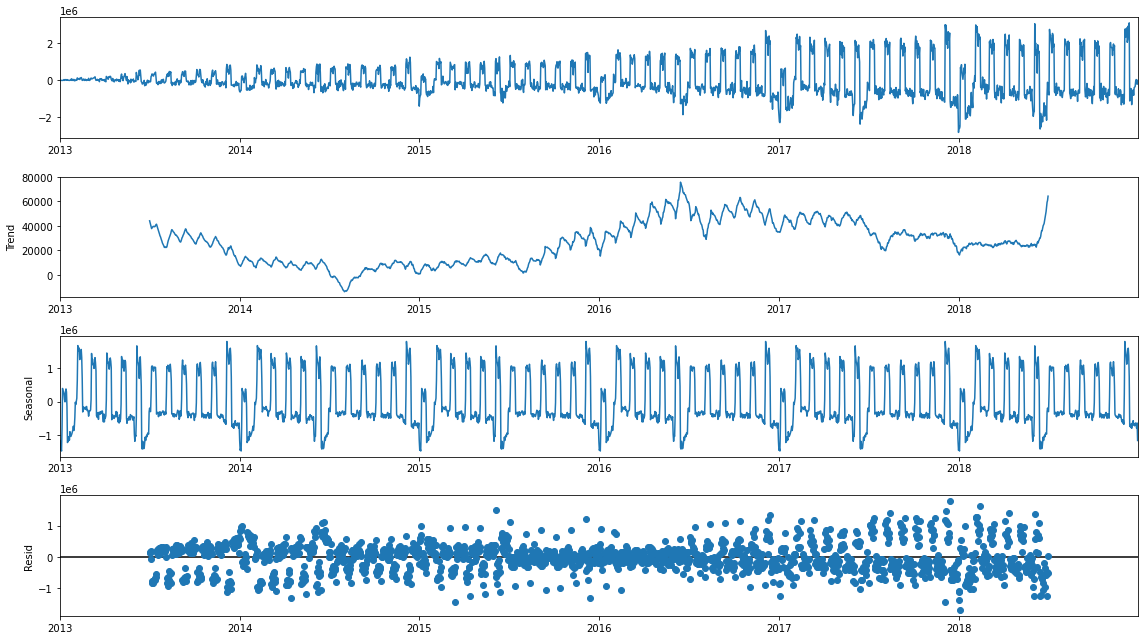

In [31]:
decomp_net_cash_balance = sm.tsa.seasonal_decompose(closing_balances, model='additive', period=365)
fig = decomp_net_cash_balance.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show();

Observations:

1. This is the original observed data that we are decomposing.
2. The trend component shows an upward direction. The trend indicates that there is a positive (increasing or upward) long-term movement.
3. The seasonal component shows the seasonality effect and the repeating pattern of highs and lows within the year.
4. Finally, the residual (noise) component shows the random variation in the data
after applying the model. In this case, a multiplicative model was used.

## Modeling

### Finding the Autocorrelation   
In order to find out which lagas have a strong correlation to the forecasted value we can use the plot_acf() function from the statsmodels module. This creates a plot that shows how much each prevoius lag influences the future lag.

In [91]:
#resampling the series to monthly data
monthly_data = closing_balances.resample('M').sum()

#1st order differencing
monthly_data['lag_1'] = monthly_data['net_cash_balance'].diff()
monthly_data.dropna(inplace = True)

**ACF & PACF Plots**

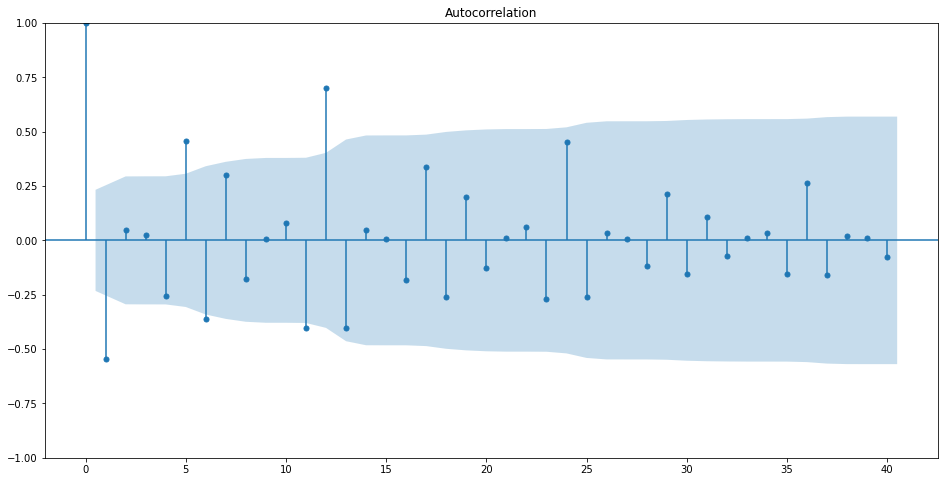

In [92]:
fig, ax = plt.subplots(figsize = (16,8))
plot_acf(monthly_data['lag_1'] , lags = 40, ax=ax)
plt.show();

In [ ]:
#

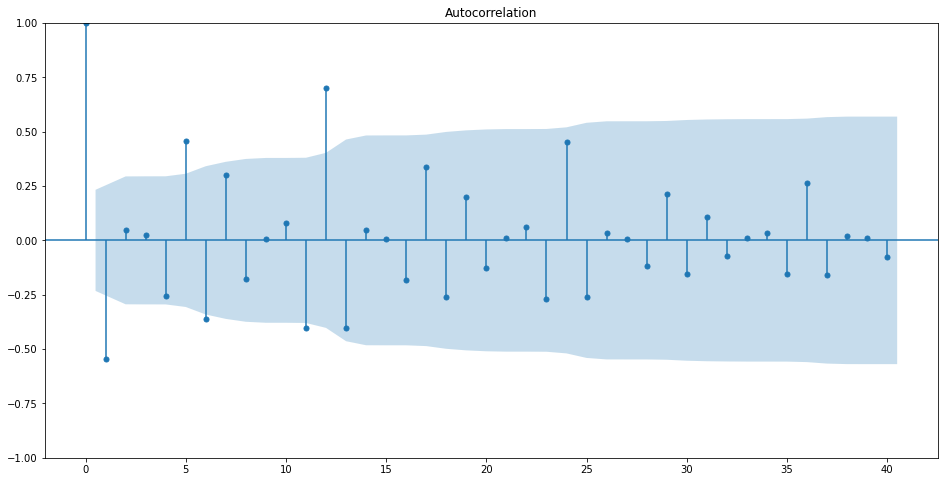

In [93]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(monthly_data['lag_1'],lags=40, ax=ax)
plt.show();

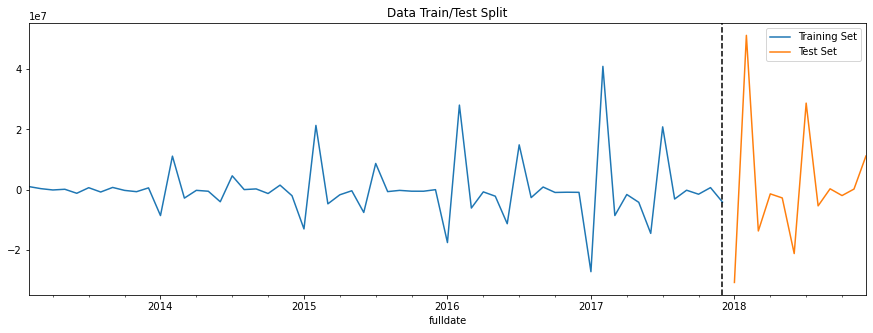

In [125]:
# split the data
train = pd.DataFrame(monthly_data.loc['2013-02-28':'2017-12-31']['lag_1'])
test = pd.DataFrame(monthly_data.loc['2018-01-31':'2018-12-31']['lag_1'])

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

#### **Model 1 : ARIMA**

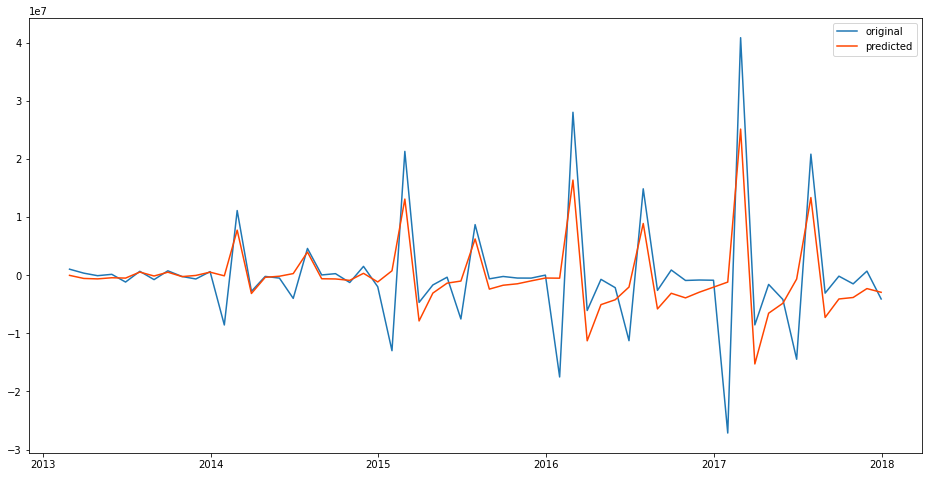

In [101]:
arima = ARIMA(train['lag_1'], order = (0, 0, 1))  
arima_results = arima.fit()  
#plotting the results
plt.figure(figsize=(16,8))
plt.plot(train['lag_1'],  label='original')
plt.plot(arima_results.fittedvalues, color='orangered', label='predicted')
plt.legend(loc='best')
plt.show();

In [104]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  lag_1   No. Observations:                   59
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1011.089
Date:                Sun, 19 Mar 2023   AIC                           2028.179
Time:                        13:07:22   BIC                           2034.411
Sample:                    02-28-2013   HQIC                          2030.612
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.594e+04   7.68e+04     -0.208      0.836   -1.66e+05    1.35e+05
ma.L1         -0.9728      0.143     -6.808      0.000      -1.253      -0.693
sigma2      6.019e+13   7.69e-05   7.82e+17      0.000    6.02e+13    6.02e+13
===================================================================================
Ljung-Box (L1) (Q):                   4.10   Jarque-Bera (JB):                88.93
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):              14.38   Skew:                            -1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.29e+34. Standard errors may be unstable.
"""

#### Arima test predictions

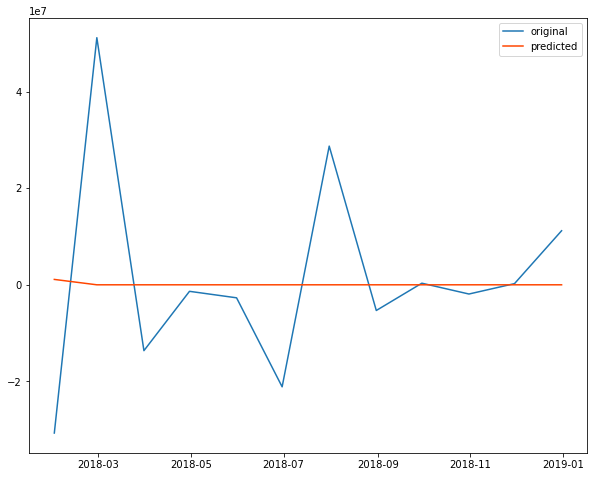

In [142]:
arima_preds = arima_results.predict(start="'2018-01-31", end="2018-12-31")

#plotting the comparison
plt.figure(figsize=(10,8))
plt.plot(test['lag_1'],  label='original')
plt.plot(arima_preds, color='orangered', label='predicted')
plt.legend(loc='best')
plt.show();

Observations:
    
1. The model overfitted on the train set and performed poorly on the test set

#### **Model 2 : SARIMA**

The ARIMA model failed to take into account the seasonality on the balances, hence the SARIMA model was chosen 

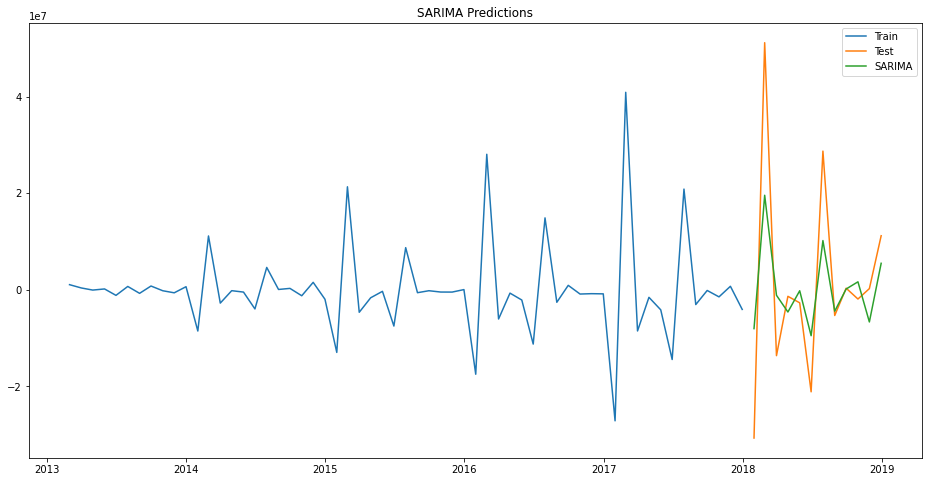

In [136]:
#fitting the model
sarima = SARIMAX(train['lag_1'], order=(0, 0, 1),seasonal_order=(0,0,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()

#model predictions
sarima_preds = sarima.predict(start="2018-01-01", end="2018-12-31", dynamic=True)

#plotting the comparison
plt.figure(figsize=(16,8))
plt.title('SARIMA Predictions')
plt.plot( train['lag_1'], label = 'Train')
plt.plot(test['lag_1'], label = 'Test')
plt.plot(sarima_preds, label='SARIMA')
plt.legend(loc='best')
plt.show();

***Results***

In [137]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              lag_1   No. Observations:                   59
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -760.313
Date:                            Sun, 19 Mar 2023   AIC                           1526.627
Time:                                    13:55:59   BIC                           1532.047
Sample:                                02-28-2013   HQIC                          1528.647
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0120      0.083    -12.195      0.000      -1.175      -0.849
ma.S.L12       1.3492      0.229      5.885      0.000       0.900       1.799
sigma2      6.018e+13   5.14e-16   1.17e+29      0.000    6.02e+13    6.02e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                35.37
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               3.20   Skew:                            -1.34
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.54e+45. Standard errors may be unstable.
"""

## **Evaluation**

In [135]:
correct = 0
total = test.shape[0]

rmse = np.sqrt(mean_squared_error(test['lag_1'], sarima_preds))
print('Test RMSE: %.3f' % rmse)
mape_sum = 0
for i,j in zip(test['lag_1'], sarima_preds):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0
for i,j in zip(test['lag_1'], sarima_preds):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100
print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

Test RMSE: 13720318.067
Test MAPE: 334.335
Test MPE: 294.740


#### Model Performance Observations

<ol>
    <li>ARIMA model - the model overfitted on the train and performed poory on the test data.</li><br>
    <li>SARIMA model -  the model perfromed fairly well on both the train and test data. It captured the monthly seasonaity in the cash balalnces well but did not capture the extreme values.</li><br>
    <li>Further attempts to reduce the variance and seasonality present in the data failed. The sarima model perfromed worse on the data after the second differencing.</li><br>

</ol>

## **Conclusion**

#### *Findings*
<ol type='square'>
    <li >There is seasonality in cash transactions - we observed spikes in cash withdrawals at the end of the year and 
in the mid -year around June.A high volume of cash credits is also observed in the mid and end of year periods(June and December)</li><br>
    <li> There are more instances where the cash withdrawals outweighed the cash balances -
indicating that the bank frequently requested for extra cash to cover heavy withdrawals.</li><br>
    <li>There was no observed correlation between a particular day of the week and the net cash balance.</li><br>
    <li>There is predictability in the cash balances - our final model was able to capture correctly the monthly seasonality in the cash balances. The model however, did not capture instances where there were extreme values.</li><br>
</ol>
